# Assignment 2 - Image Enhancement

### Name: OM M PATEL
### Roll No: 21BCP094

In [22]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Equil Images: ['equil/img3.jpg', 'equil/img2.jpg', 'equil/img1.avif', 'equil/img4.tif', 'equil/img5.tif', 'equil/img6.tif']
Specfi Images: ['specfi/refer_img2.png', 'specfi/lena_ref1.jpg', 'specfi/input_img1.jpg', 'specfi/input_img2.png', 'specfi/input_img3.png', 'specfi/input_img4.png', 'specfi/input_img5.png']


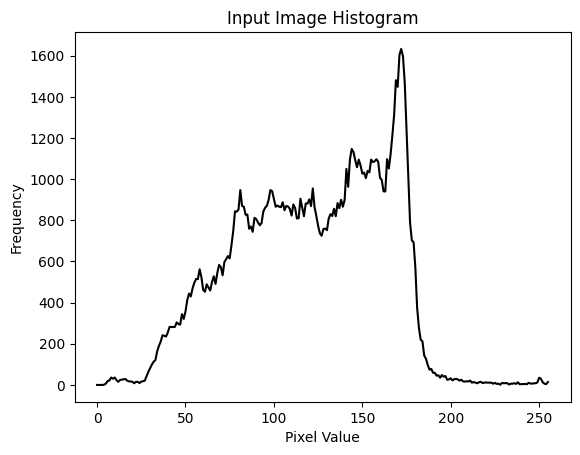

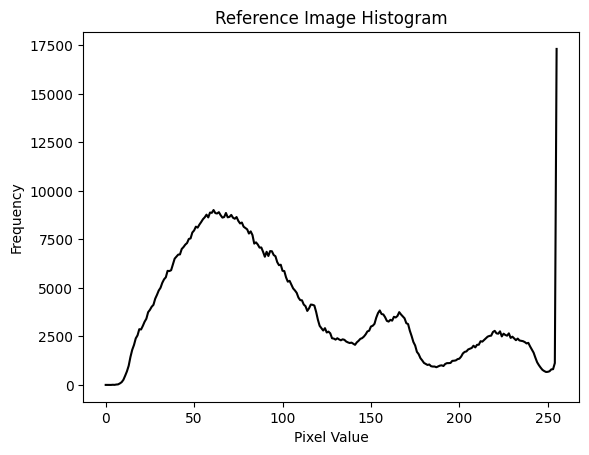

In [23]:
def load_image(file_path):
    try:
        return np.array(Image.open(file_path))
    except Exception as e:
        print(f"Error loading image at {file_path}: {e}")
        return None
    
def save_image(image_array, output_path):
    Image.fromarray(image_array.astype(np.uint8)).save(output_path)   

def plot_histogram(image, title):
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    plt.plot(histogram, color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

equil_folder = 'equil'
specfi_folder = 'specfi'

equil_images = [os.path.join(equil_folder, img) for img in os.listdir(equil_folder)]
specfi_images = [os.path.join(specfi_folder, img) for img in os.listdir(specfi_folder)]

print("Equil Images:", equil_images)
print("Specfi Images:", specfi_images)

# Choose the first image from each folder for demonstration
input_image_path = equil_images[0]
reference_image_path = specfi_images[0]

input_image = load_image(input_image_path)
reference_image = load_image(reference_image_path)

# Plot unnormalized histograms
plot_histogram(input_image, 'Input Image Histogram')
plot_histogram(reference_image, 'Reference Image Histogram')


In [35]:
input_image

array([[128, 128, 129, ..., 111, 110, 111],
       [127, 128, 130, ..., 110, 109, 109],
       [128, 129, 131, ..., 111, 110, 108],
       ...,
       [ 37,  38,  37, ...,  38,  30,  16],
       [ 36,  36,  36, ...,  38,  26,  16],
       [ 36,  36,  36, ...,  38,  23,  15]], dtype=uint8)

In [36]:
reference_image

array([[[ 96,  94,  90],
        [ 91,  89,  89],
        [ 87,  85,  87],
        ...,
        [106, 113,  86],
        [116, 120,  93],
        [ 92,  98,  76]],

       [[ 88,  85,  81],
        [ 90,  88,  86],
        [ 87,  85,  84],
        ...,
        [ 94, 105,  76],
        [112, 124,  97],
        [103, 116,  90]],

       [[ 93,  88,  86],
        [ 99,  96,  94],
        [ 94,  92,  90],
        ...,
        [ 90, 106,  76],
        [ 96, 112,  85],
        [ 94, 109,  82]],

       ...,

       [[ 98, 114,  78],
        [ 93,  97,  66],
        [ 83,  81,  54],
        ...,
        [243, 234, 227],
        [243, 234, 229],
        [240, 235, 229]],

       [[ 80,  89,  61],
        [ 82,  87,  55],
        [ 95,  99,  66],
        ...,
        [232, 229, 217],
        [234, 230, 218],
        [234, 230, 222]],

       [[ 80,  88,  58],
        [ 80,  88,  53],
        [108, 116,  80],
        ...,
        [230, 226, 220],
        [225, 226, 212],
        [219, 221, 210]]

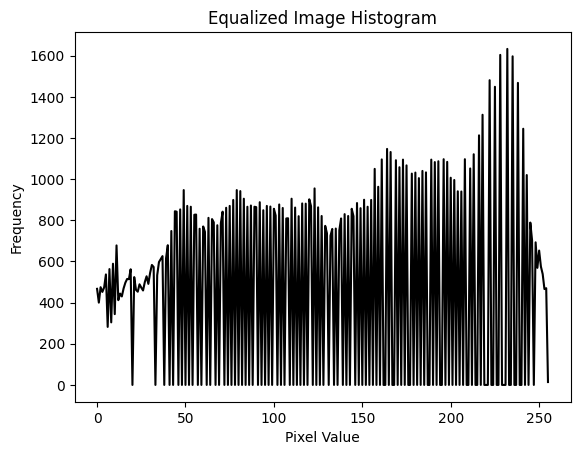

In [24]:
# Function for histogram equalization
def histogram_equalization(image):
    histogram = np.zeros(256)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1

    cumulative_distribution = np.cumsum(histogram) / np.sum(histogram)

    equalized_image = np.interp(image.flatten(), range(256), cumulative_distribution * 255)
    return equalized_image.reshape(image.shape).astype(np.uint8)

# Histogram Equalization
equalized_image = histogram_equalization(input_image)
plot_histogram(equalized_image, 'Equalized Image Histogram')


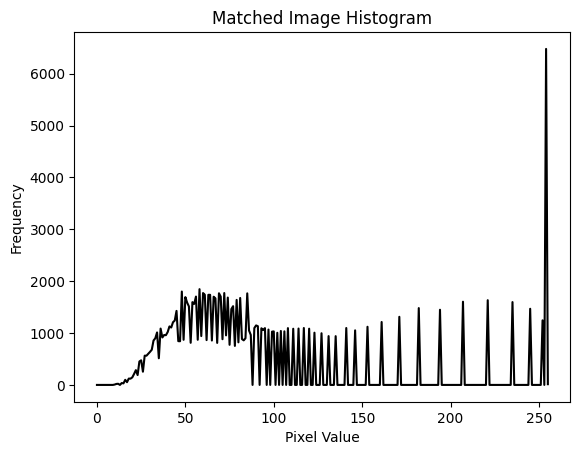

In [25]:
#histogram matching
def histogram_matching(input_image, reference_image):
    input_histogram = np.zeros(256)
    reference_histogram = np.zeros(256)

    for pixel_value_input, pixel_value_reference in zip(input_image.flatten(), reference_image.flatten()):
        input_histogram[pixel_value_input] += 1
        reference_histogram[pixel_value_reference] += 1

    input_cumulative_distribution = np.cumsum(input_histogram) / np.sum(input_histogram)
    reference_cumulative_distribution = np.cumsum(reference_histogram) / np.sum(reference_histogram)

    mapping_function = np.interp(input_cumulative_distribution, reference_cumulative_distribution, range(256))

    matched_image = np.interp(input_image.flatten(), range(256), mapping_function)
    return matched_image.reshape(input_image.shape).astype(np.uint8)

# Histogram Matching
matched_image = histogram_matching(input_image, reference_image)
plot_histogram(matched_image, 'Matched Image Histogram')


### EXTRA


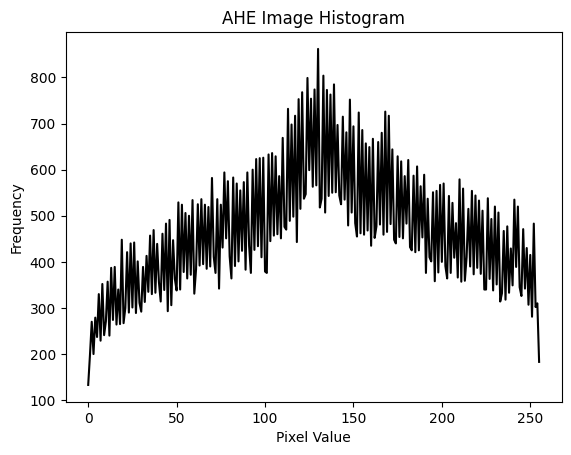

In [26]:
# Function for adaptive histogram equalization (AHE)
def adaptive_histogram_equalization(image, window_size):
    height, width = image.shape
    ahe_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            min_row = max(0, i - window_size // 2)
            max_row = min(height - 1, i + window_size // 2)
            min_col = max(0, j - window_size // 2)
            max_col = min(width - 1, j + window_size // 2)

            local_histogram, _ = np.histogram(image[min_row:max_row + 1, min_col:max_col + 1].flatten(), bins=256,
                                              range=[0, 256])
            local_cumulative_distribution = np.cumsum(local_histogram) / np.sum(local_histogram)

            ahe_image[i, j] = np.interp(image[i, j], range(256), local_cumulative_distribution) * 255

    return ahe_image.astype(np.uint8)

# Adaptive Histogram Equalization (AHE)
ahe_image = adaptive_histogram_equalization(input_image, window_size=25)
plot_histogram(ahe_image, 'AHE Image Histogram')


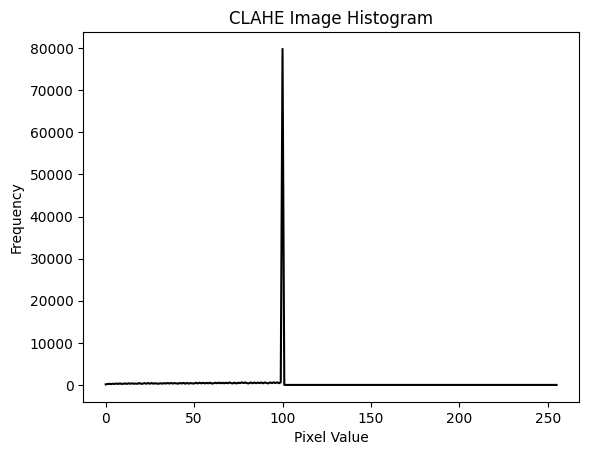

In [27]:
# Function for contrast-limited adaptive histogram equalization (CLAHE)
def clahe(image, window_size, clip_limit):
    height, width = image.shape
    clahe_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            min_row = max(0, i - window_size // 2)
            max_row = min(height - 1, i + window_size // 2)
            min_col = max(0, j - window_size // 2)
            max_col = min(width - 1, j + window_size // 2)

            local_histogram, _ = np.histogram(image[min_row:max_row + 1, min_col:max_col + 1].flatten(), bins=256,
                                              range=[0, 256])
            local_cumulative_distribution = np.cumsum(local_histogram) / np.sum(local_histogram)

            ahe_value = np.interp(image[i, j], range(256), local_cumulative_distribution) * 255
            clahe_image[i, j] = np.clip(ahe_value, 0, clip_limit)

    return clahe_image.astype(np.uint8)

# Contrast-Limited Adaptive Histogram Equalization (CLAHE)
clahe_image = clahe(input_image, window_size=25, clip_limit=100)
plot_histogram(clahe_image, 'CLAHE Image Histogram')


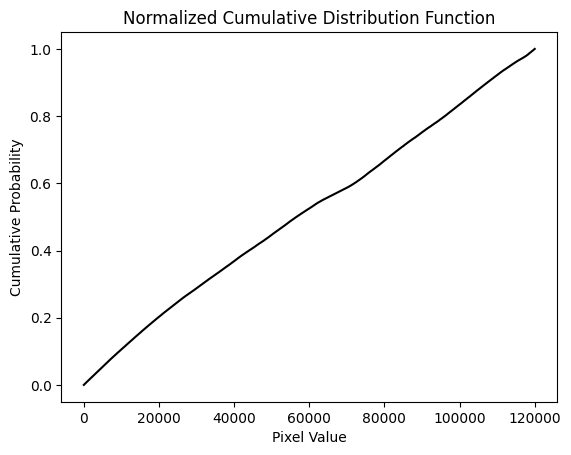

In [28]:
# Plot normalized cumulative distribution function
cumulative_distribution = np.cumsum(input_image.flatten()) / np.sum(input_image.flatten())
plt.plot(cumulative_distribution, color='black')
plt.title('Normalized Cumulative Distribution Function')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')
plt.show()


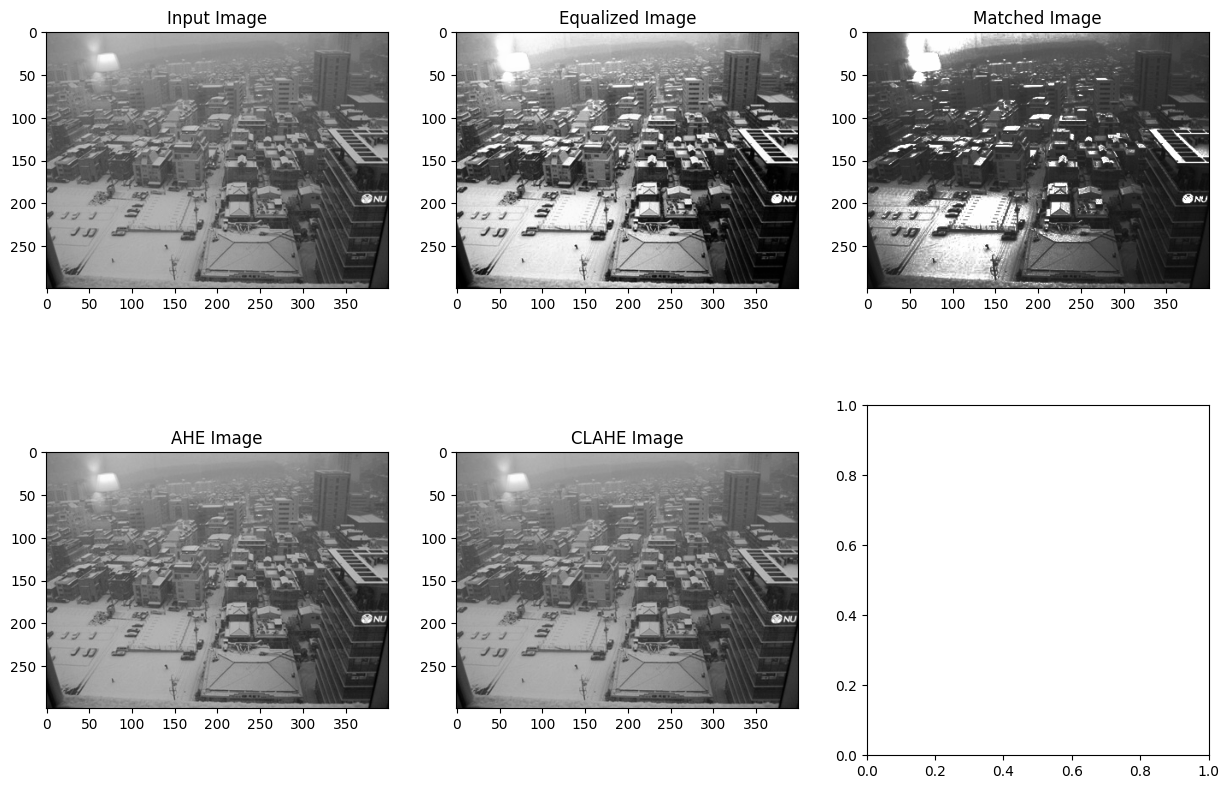

In [32]:
# Display output images using subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(input_image, cmap='gray')
axs[0, 0].set_title('Input Image')

axs[0, 1].imshow(equalized_image, cmap='gray')
axs[0, 1].set_title('Equalized Image')

axs[0, 2].imshow(matched_image, cmap='gray')
axs[0, 2].set_title('Matched Image')

# Load additional images for demonstration
ahe_image_path = '/Users/om-college/Library/CloudStorage/OneDrive-pdpu.ac.in/PDEU/DIP-Digital Image Processing/Assignment-2/equil/img3.jpg'
clahe_image_path = '/Users/om-college/Library/CloudStorage/OneDrive-pdpu.ac.in/PDEU/DIP-Digital Image Processing/Assignment-2/equil/img3.jpg'

ahe_image = load_image(ahe_image_path)
clahe_image = load_image(clahe_image_path)

# Adaptive Histogram Equalization (AHE)
axs[1, 0].imshow(ahe_image, cmap='gray')
axs[1, 0].set_title('AHE Image')

# Contrast-Limited Adaptive Histogram Equalization (CLAHE)
axs[1, 1].imshow(clahe_image, cmap='gray')
axs[1, 1].set_title('CLAHE Image')

# Save the images
save_image(equalized_image, 'Output/equalized_image.jpg')
save_image(matched_image, 'Output/matched_image.jpg')
save_image(ahe_image, 'Output/ahe_image.jpg')
save_image(clahe_image, 'Output/clahe_image.jpg')

# Save the figure
plt.savefig('21BCP094_assignment2.png')

# Display the plot
plt.show()
